In [ ]:
import os

for dataset in ["BGL"]:
    log_path = os.path.join("datasets", dataset, f"{dataset}.log")
    if os.path.exists(log_path):
        print(f"=== {dataset} ===")
        with open(log_path, "r", errors="ignore") as f:
            for i in range(10):
                line = f.readline()
                if not line:
                    break  # Stop if file has fewer than 5 lines
                print(line.strip())
        print()  # Blank line between datasets
    else:
        print(f"❌ Log file not found for {dataset}: {log_path}")


=== BGL ===
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.823719 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.982731 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.51.131467 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
- 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.51.293532 R02-M1-N0-C:J12-U11 RAS KERNE

In [ ]:
import os
import pandas as pd

# Number of lines to read
n = 2

# Define file paths
files = [
    os.path.join("preprocess_BGL/parsed_logs", "BGL_parsed.csv"),
]

# Loop through each file and display the first n lines + column names
for file_path in files:
    if os.path.exists(file_path):
        print(f"=== {os.path.basename(file_path)} ===")
        df = pd.read_csv(file_path, nrows=n)
        
        # Print column names
        print("Columns:", list(df.columns))
        print()

        # Print each row as dictionary for full visibility
        for idx, row in df.iterrows():
            print(f"Row {idx}:")
            for col, val in row.items():
                print(f"  {col}: {val}")
            print()
    else:
        print(f"❌ File not found: {file_path}")


=== BGL_parsed.csv ===
Columns: ['Label', 'Timestamp', 'Date', 'Node', 'Time', 'NodeRepeat', 'Type', 'Component', 'Level', 'Content', 'LineId', 'EventId', 'EventTemplate', 'ParameterList']

Row 0:
  Label: -
  Timestamp: 1117838570
  Date: 2005.06.03
  Node: R02-M1-N0-C:J12-U11
  Time: 2005-06-03-15.42.50.363779
  NodeRepeat: R02-M1-N0-C:J12-U11
  Type: RAS
  Component: KERNEL
  Level: INFO
  Content: instruction cache parity error corrected
  LineId: 1
  EventId: 1
  EventTemplate: instruction cache parity error corrected
  ParameterList: []

Row 1:
  Label: -
  Timestamp: 1117838570
  Date: 2005.06.03
  Node: R02-M1-N0-C:J12-U11
  Time: 2005-06-03-15.42.50.527847
  NodeRepeat: R02-M1-N0-C:J12-U11
  Type: RAS
  Component: KERNEL
  Level: INFO
  Content: instruction cache parity error corrected
  LineId: 2
  EventId: 1
  EventTemplate: instruction cache parity error corrected
  ParameterList: []



Total traces: 69724
   TaskID Node  start_timestamp  end_timestamp  isAbnormal  num_events
0       0    -       1119415930     1121453190           0          50
1       1    -       1121454011     1124217176           0          50
2       2    -       1124217987     1125504644           0          50
3       3    -       1125512157     1129724282           0          50
4       4    -       1129737882     1131483843           0          50

Label distribution:
isAbnormal
0    35953
1    33771
Name: count, dtype: int64

Percentage distribution:
isAbnormal
0    51.56
1    48.44
Name: count, dtype: float64


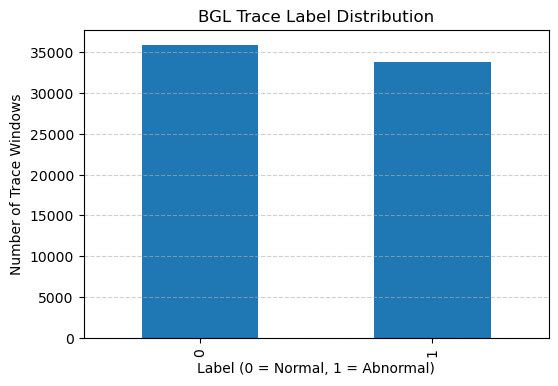

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load the traces file ---
traces_path = "master_tables/BGL/test/traces.csv"
df = pd.read_csv(traces_path)

# --- Basic info ---
print("Total traces:", len(df))
print(df.head())

# --- Label distribution ---
label_counts = df['isAbnormal'].value_counts().sort_index()

print("\nLabel distribution:")
print(label_counts)

# --- Percentages ---
print("\nPercentage distribution:")
print((label_counts / len(df) * 100).round(2))

# --- Plot ---
plt.figure(figsize=(6,4))
label_counts.plot(kind="bar")
plt.title("BGL Trace Label Distribution")
plt.xlabel("Label (0 = Normal, 1 = Abnormal)")
plt.ylabel("Number of Trace Windows")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [7]:
import torch
print(torch.cuda.is_available())

False
